In [10]:
# This is a notebook to perform spectral extraction at specific location/region from JWST MIRI/MRS cubes
# and fit it with CAFE

In [ ]:
import os
os._exit(00)

In [1]:
import sys
# Include the path to the folder where CAFE and CRETA have been installed. Usually it's one level up from the notebook/ folder.
sys.path.insert(0, '../CRETA/')
sys.path.insert(0, '../CAFE/')

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
import matplotlib.ticker
from matplotlib.backends.backend_pdf import PdfPages

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# SPECTRAL EXTRACTION
import creta
creta_dir = '../CRETA/'

User API Created


In [3]:
# Read parameter file with extraction keywords
param_fn = 'IIZw096_MIRI_single_params.txt'
pf = open(creta_dir+'param_files/'+param_fn,'r')
print(pf.read())
pf.close()

cubes = ch1-short, ch1-medium, ch1-long, ch2-short, ch2-medium, ch2-long, ch3-short, ch3-medium, ch3-long, ch4-short, ch4-medium, ch4-long
user_r_ap = 0.3                 # [arcsec] Aperture size
user_ra = 20h57m24.368s         # RA of the extraction location
user_dec = 17d07m39.21s         # Dec of the extraction location
point_source = False            # [True/False] True = Cone extraction. False = Cylinder extraction
lambda_ap = 5.4                 # [microns] The user-specified aperture size (user_r_ap) will be defined at this wavelength (ignored if point_source=False; cylinder extraction)
aperture_correction = False     # [True/False]
centering = True                # [True/False] At lambda_cent, this will update user_ra,user_dec to recenter the extraction location  
lambda_cent = 5.4               # [microns] The wavelength at which to perform the centering (ignored if centering=False)
background_sub = False          # [True/False]
r_ann_in = 0.0                  # [arcsec] When 

In [4]:
# Load the extraction tool (CRETA)
c = creta.creta(creta_dir)

CAFE Region Extraction Tool Automaton (CRETA) initialized


In [5]:
# Perform the extraction
c.singleExtraction(parameter_file=True, parfile_name=param_fn, data_path=creta_dir+'data/IIZw096/', output_filebase_name='IIZw096')

User API Created
PSFs: ../CRETA/PSFs/
Data: ../CRETA/data/IIZw096/
########################################
     Load User Parameters 
########################################
Cubes: ['ch1-short', 'ch1-medium', 'ch1-long', 'ch2-short', 'ch2-medium', 'ch2-long', 'ch3-short', 'ch3-medium', 'ch3-long', 'ch4-short', 'ch4-medium', 'ch4-long']
Aperture radii: [0.3] (arcsec)
RA,δ: [314.35153333,17.12755833] (degrees)
Point Source: False
Aperture Correction: False (PSF Correction)
Centering: True
Centering lambda: 5.4μm
Background Subtraction: False
PSF sub-cubes Path: ../CRETA/PSFs/
Data sub-cubes Path: ../CRETA/data/IIZw096/
########################################
Loading Data
Load file: ../CRETA/data/IIZw096/Level3_bandcube_ch1-short_s3d.fits
Load file: ../CRETA/data/IIZw096/Level3_bandcube_ch1-medium_s3d.fits
Load file: ../CRETA/data/IIZw096/Level3_bandcube_ch1-long_s3d.fits
Load file: ../CRETA/data/IIZw096/Level3_bandcube_ch2-short_s3d.fits
Load file: ../CRETA/data/IIZw096/Level3_bandcub

Centering around 5.399600082746474 um in cube ch1_SHORT
Old coordinates were: 314.35153333 17.12755833
New coordinates are: <SkyCoord (ICRS): (ra, dec) in deg
    (314.35153333, 17.12755833)>
ch1_SHORT photometry exectued in: 1.021763801574707 seconds
ch1_MEDIUM photometry exectued in: 1.5950791835784912 seconds
ch1_LONG photometry exectued in: 1.4212689399719238 seconds
ch2_SHORT photometry exectued in: 0.8955798149108887 seconds
ch2_MEDIUM photometry exectued in: 1.0565760135650635 seconds
ch2_LONG photometry exectued in: 1.2652089595794678 seconds
ch3_SHORT photometry exectued in: 0.7923750877380371 seconds
ch3_MEDIUM photometry exectued in: 0.8974010944366455 seconds
ch3_LONG photometry exectued in: 0.9838228225708008 seconds
ch4_SHORT photometry exectued in: 0.5501978397369385 seconds
ch4_MEDIUM photometry exectued in: 0.644136905670166 seconds
ch4_LONG photometry exectued in: 0.5562500953674316 seconds
Photometry exectued in': 11.701456069946289 seconds
Initiating stitching proce

In [6]:
# The spectrum/spectra are extracted.

In [7]:
# SPECTRAL FITTING
import cafe_io
from cafe_io import *
import cafe_helper
import cafe
cafe_dir = '../CAFE/'

In [8]:
# Setup data directory and file name, and parameter files.
source_fd = creta_dir+'extractions/'
source_fn = 'IIZw096_SingleExt_r0.3as_cube.fits'
source_fnb = source_fn.split('.fits')[0].replace('.','')

inppar_fn = cafe_dir+'inp_parfiles/inpars_jwst_miri_IIZw096.ini'
optpar_fn = cafe_dir+'opt_parfiles/default_opt.cafe'

z=0.03636

In [9]:
# Load CAFE
s = cafe.specmod(cafe_dir)

In [10]:
# Read the spectrum
s.read_spec(source_fn, file_dir=source_fd, z=z)

Filename: ../CRETA/extractions/IIZw096_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (11532,)   float64   
  2  ERR           1 ImageHDU         7   (11532,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (11532,)   float64   
  4  ERR_ST        1 ImageHDU         7   (11532,)   float64   
  5  DQ            1 ImageHDU         7   (11532,)   float64   
  6  WAVE          1 ImageHDU         7   (11532,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   11532R x 1C   [20A]   


Generating continuum profiles for guess model
CH1S is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
CH4L is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
Parameter object has 33 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


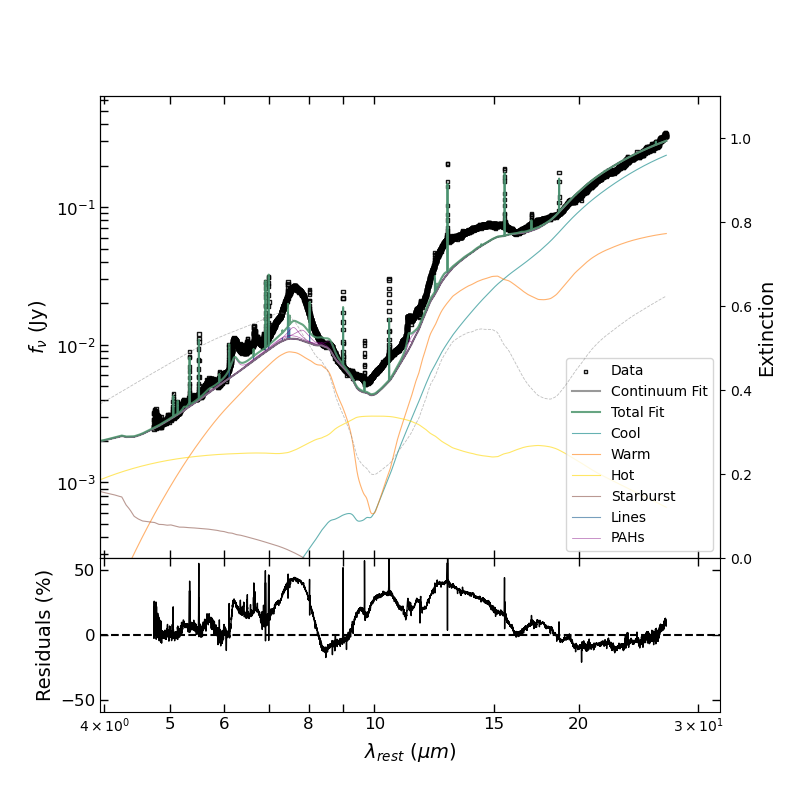

In [11]:
# Plot initial model
s.plot_spec_ini(inppar_fn, optpar_fn)

In [12]:
# Fit spectrum
s.fit_spec(inppar_fn, optpar_fn)

Generating parameter cube with initial/full parameter object
CH1S is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
CH4L is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
Parameter object has 39 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating parameter object
CH1S is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
CH4L is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
Parameter object has 33 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating continuum profiles
ISRF
ISRF
3.12 seconds to make continnum profiles
Fitting 217 parameters
Iteration 1/5(max): 2023-02-23 18:08:31.339426 -----------------
True in 30 steps
55.95 seconds elapsed
No errors retune

NameError: name 'parcube2parobj' is not defined

In [ ]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


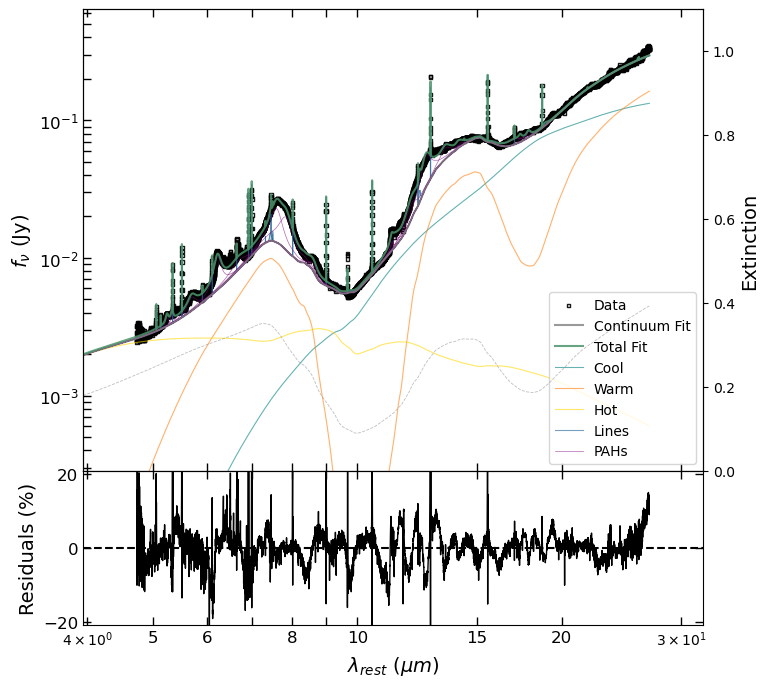

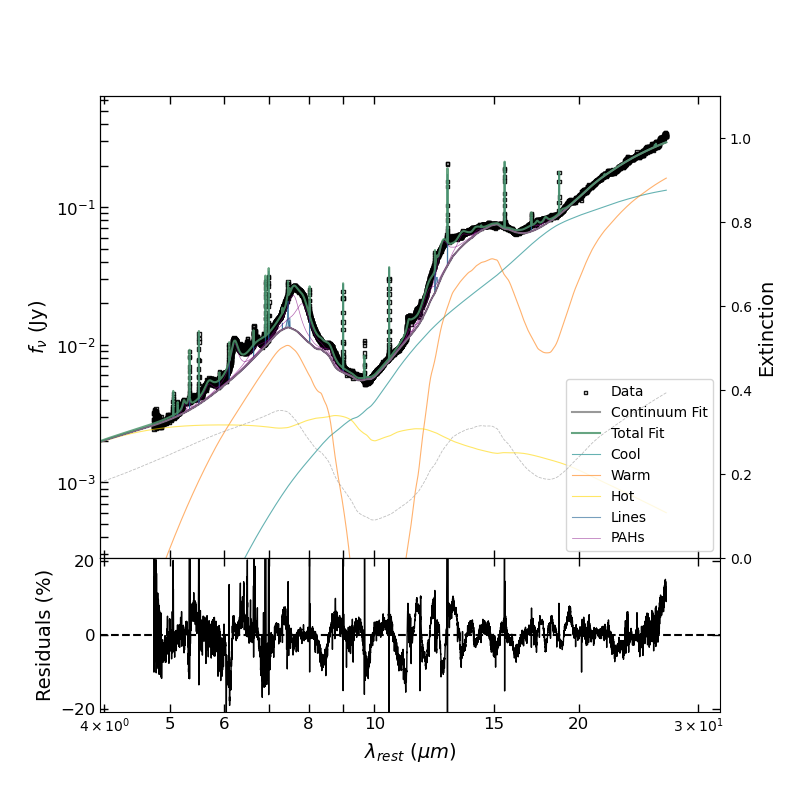

In [10]:
# Plot fitted spectrum
s.plot_spec_fit(inppar_fn, optpar_fn)

In [7]:
########### Starting a CAFE session from scratch ###############

parcube_fd = '../CAFE/output/'+source_fnb+'/'
parcube_fn = source_fnb+'_parcube.fits'

In [8]:
# Load the the spectrum
s.read_spec(source_fn, file_dir=source_fd, z=z)

Filename: ../CRETA/extractions/IIZw096_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (11532,)   float64   
  2  ERR           1 ImageHDU         7   (11532,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (11532,)   float64   
  4  ERR_ST        1 ImageHDU         7   (11532,)   float64   
  5  DQ            1 ImageHDU         7   (11532,)   float64   
  6  WAVE          1 ImageHDU         7   (11532,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   11532R x 1C   [20A]   


In [9]:
# Load the parameter cube from disk
s.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../CAFE/output/IIZw096_SingleExt_r03as_cube/IIZw096_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 235)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 235)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 235)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 235)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 235)   float64   
  6  EXPR          1 BinTableHDU     13   235R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   235R x 2C   [I, 32A]   


ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


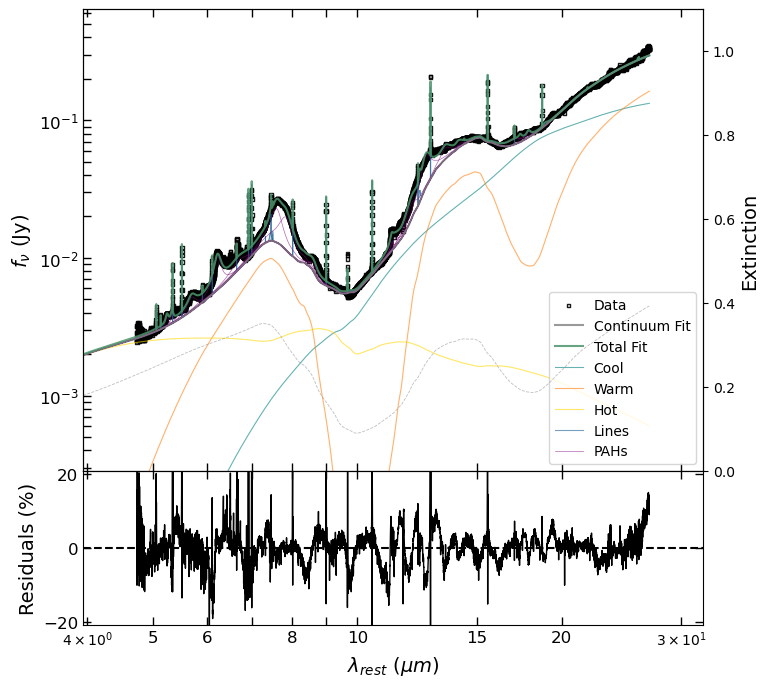

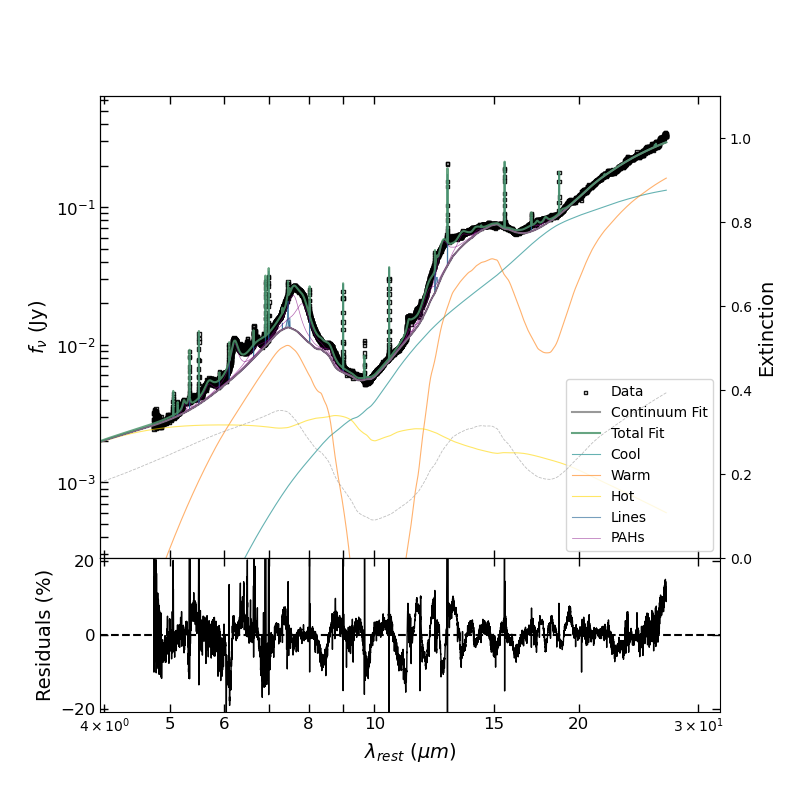

In [14]:
# Plot the previous fit
s.plot_spec_fit(inppar_fn, optpar_fn)

In [15]:
# One may want to fit again the spectrum but using as an initial guess the result from the fit of another spectrum
# (or from a previous fit from the same spectrum, although this is not recommended as most parameters have been already optimized and that gives trouble to LMFIT)
# For this example case, nevertheless, we use the previous fit from the same spectrum

In [16]:
# Note this is technically unnecessary if the initalization is done with the same spectrum, since the parameter cube is already loaded in s.parcube, but for completeness:
ini = cafe.specmod(cafe_dir)
ini.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../CAFE/output/IIZw096_SingleExt_r03as_cube/IIZw096_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 235)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 235)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 235)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 235)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 235)   float64   
  6  EXPR          1 BinTableHDU     13   235R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   235R x 2C   [I, 32A]   


Generating continuum profiles for guess model
CH1S is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
CH4L is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
Parameter object has 33 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
The initial parameters will be set to the values from the parameter cube provided
Parameter object has 33 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


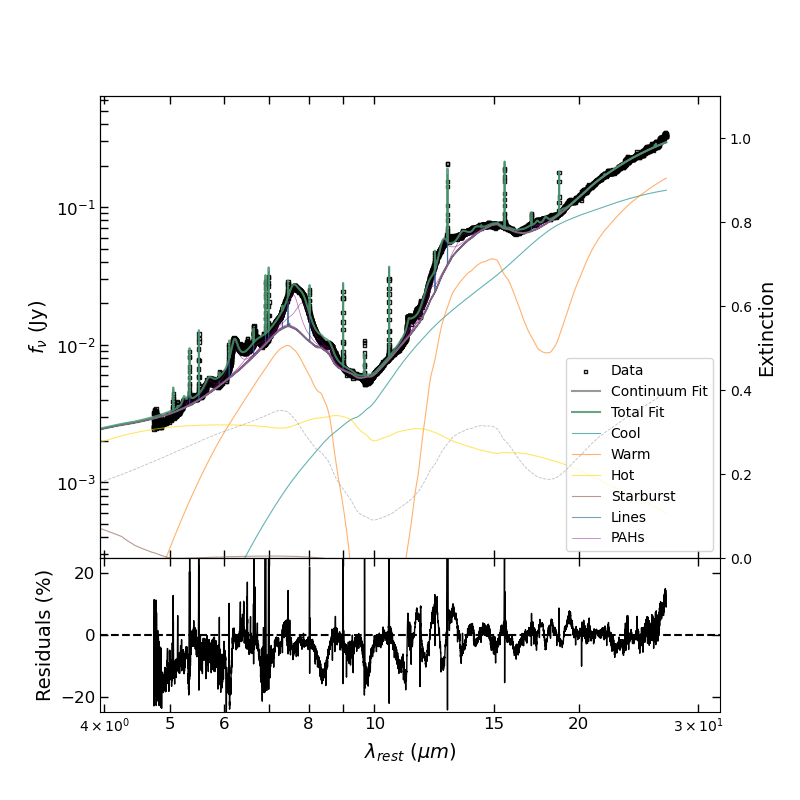

In [17]:
# Plot the initialized spectrum (should be the same as the fitted spectrum above)
s.plot_spec_ini(inppar_fn, optpar_fn, ini_parcube=ini.parcube)

In [18]:
# Refit using the last fit results as initialization
s.fit_spec(inppar_fn, optpar_fn, ini_parcube=ini.parcube)

Generating parameter cube with initial/full parameter object
CH1S is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
CH4L is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
Parameter object has 39 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating parameter object
CH1S is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
CH4L is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
Parameter object has 33 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
The params will be set to the parameters of the parcube provided for initialization
Parameter object has 33 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating continuum profiles
ISRF
ISRF
2.77 second

/Users/tanio/Sync/pywork/CAFE/notebooks/../CAFE/cafe.py:569: ResourceWarning: unclosed file <_io.BufferedReader name='../CAFE/output/IIZw096_SingleExt_r03as_cube/IIZw096_SingleExt_r03as_cube_parcube.fits'>
  self.parcube = parcube


In [19]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

0.024262260318279005
8.092815316303871e-08


ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


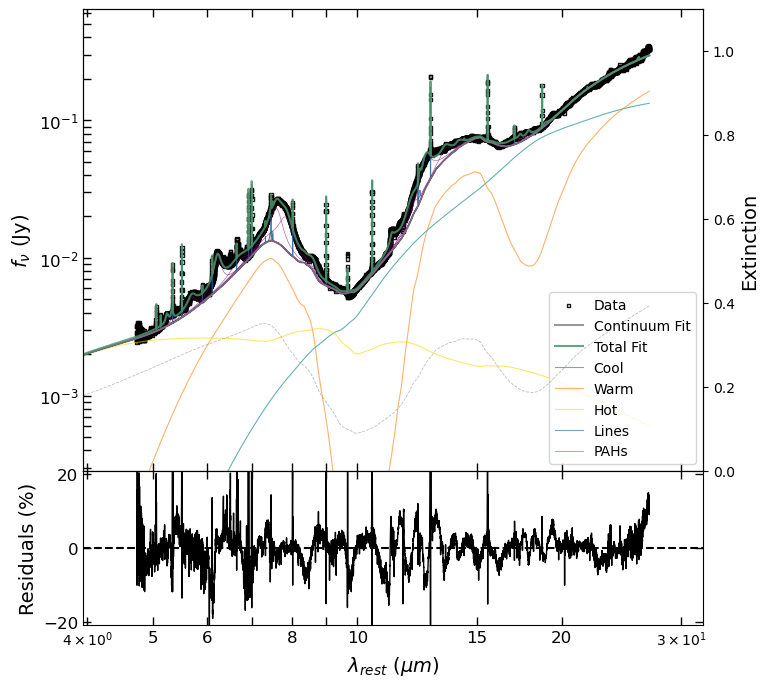

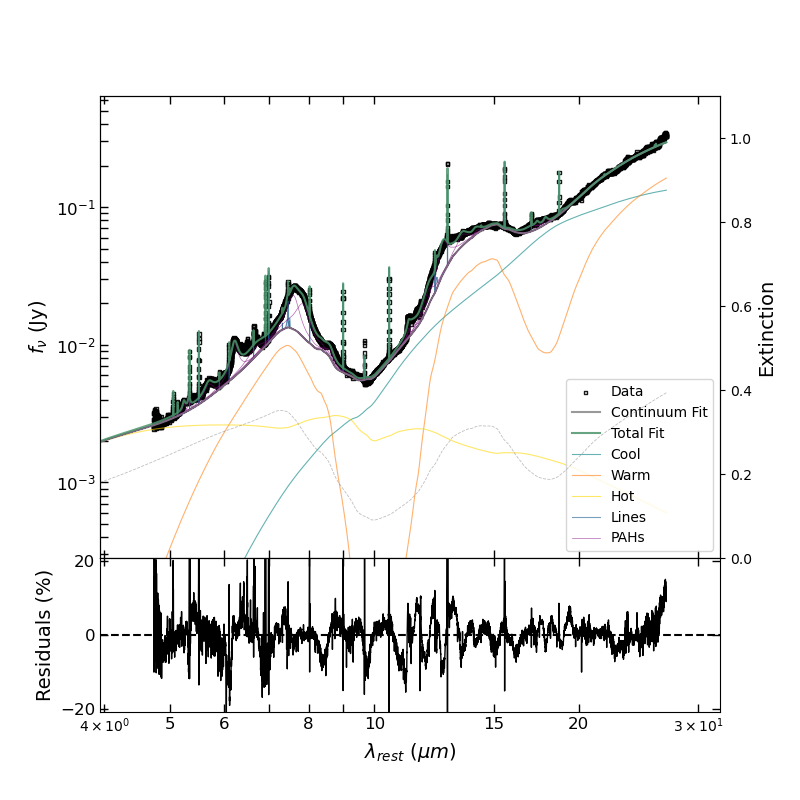

In [20]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [21]:
# We can iterate ad infinitum, but the fit probably has converged and it's probably for the worse
ini2 = cafe.specmod(cafe_dir)
ini2.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../CAFE/output/IIZw096_SingleExt_r03as_cube/IIZw096_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 235)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 235)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 235)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 235)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 235)   float64   
  6  EXPR          1 BinTableHDU     13   235R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   235R x 2C   [I, 32A]   


In [22]:
s.fit_spec(inppar_fn, optpar_fn, ini_parcube=ini2.parcube)

Generating parameter cube with initial/full parameter object
CH1S is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
CH4L is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
Parameter object has 39 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating parameter object
CH1S is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
CH4L is defined in .ini file but either there is no associated cube or the module definition extends beyond the spectrum waves.
Parameter object has 33 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
The params will be set to the parameters of the parcube provided for initialization
Parameter object has 33 lines, 25 PAHs, 0 opacity features, and 42 continuum parameters
Generating continuum profiles
ISRF
ISRF
2.31 second

In [23]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

-0.015966120753577458
-5.32559064495579e-08


ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


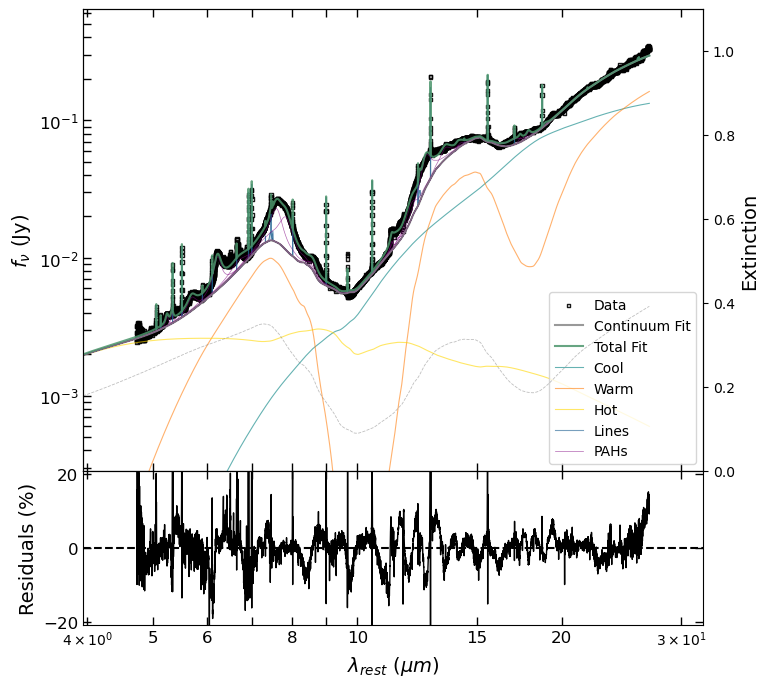

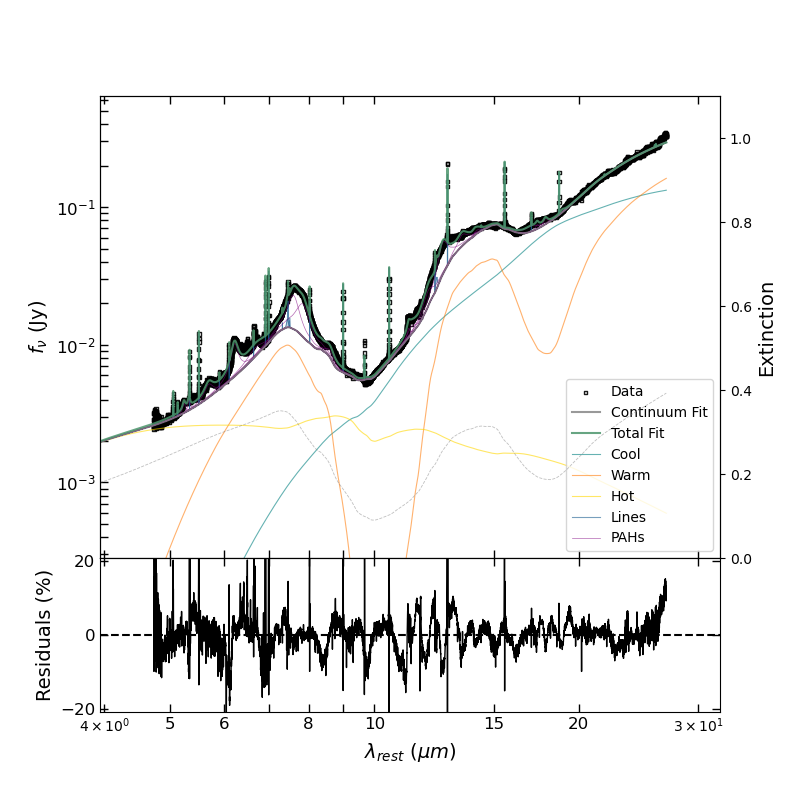

In [24]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [10]:
cafe_io.save_asdf(inppar_fn, optpar_fn, file_name=parcube_fn.split('.fits')[0])

ISRF
ISRF


2023-02-23 16:43:43,077 - stpipe - WARNING - /usr/local/anaconda3/lib/python3.8/site-packages/asdf/entry_points.py:49: AsdfWarning: asdf.resource_mappings plugin from package asdf==2.8.1 failed to load:

AttributeError: module 'asdf.resource' has no attribute 'get_core_resource_mappings'
  warnings.warn(



In [11]:
from astropy.io import ascii
from astropy.table import Table
from astropy.table import QTable

# Read output PAH table
pah = cafe_io.pah_table(s.parcube, 0, 0)
# Read output line table
line = cafe_io.line_table(s.parcube, 0, 0)

pah62 = pah[pah.index == 'PAH62'].pah_strength.values[0]
pah62_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah77 = pah[pah.index == 'PAH77_C'].pah_strength.values[0]
pah77_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah113 = pah[pah.index == 'PAH113_C'].pah_strength.values[0]
pah113_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]

x = pah62 / pah77 
x_unc = pah62 / pah77 * np.sqrt((pah62_unc/pah62)**2 + (pah77_unc/pah77)**2)
y = pah113 / pah77
y_unc = pah113 / pah77 * np.sqrt((pah113_unc/pah113)**2 + (pah77_unc/pah77)**2)

print('6.2/7.7 = {} +/- {}'.format(x, x_unc))
print('11.3/7.7 = {} +/- {}'.format(y, y_unc))

print(pah)

# Make an astropy table 
t = QTable([pah.index.values, pah.pah_strength, pah.pah_strength_unc],
           names = ('pah_complex', 'pah_strength', 'pah_strength_unc'),
           meta={'wavelength': 'micron',
                 'flux': 'W/m^2',
                }
          )

# Write PAH table in an .ecsv file
#t.write('./NGC7469_pah_tbl.ecsv', overwrite=False)

6.2/7.7 = 0.18665168000951918 +/- 0.0
11.3/7.7 = 0.1356935677299516 +/- 0.0
             pah_strength  pah_strength_unc
pah_complex                                
PAH113_C     2.290529e-19               0.0
PAH120       5.061106e-19               0.0
PAH126_C     1.399546e-18               0.0
PAH136       5.070031e-19               0.0
PAH142       9.828841e-20               0.0
PAH164       0.000000e+00               0.0
PAH170_C     8.136916e-19               0.0
PAH62        3.150710e-19               0.0
PAH77_C      1.688016e-18               0.0
PAH83        0.000000e+00               0.0
PAH86        9.852758e-20               0.0
